# Корреляция и корреляционный анализ

* 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

* 2 Задание.

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [147]:
import pandas as pd

# для корреляции
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

# для регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
water = pd.read_csv(r'C:\Users\Urmas\Desktop\Jupyter\test\Statistika\Корреляция\water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


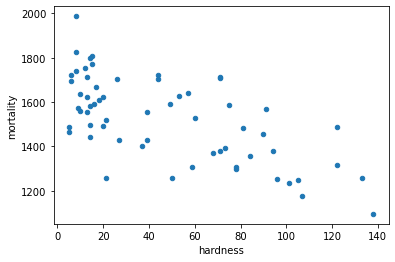

In [45]:
# построим точечный график (визуализацию) для изучения взаимосвязи смертности от жесткости воды
water.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# визуализация показывает нам имеющуюся умеренную отрицательную взаимосвязь двух величин
# взаимосвязь имеет линейный характер, нормальное распределение, значительные выбросы не наблюдаются
# значит, можем рассчитать ккоэффициент корреляции Пирсона (Спирмана, Кенделла)

In [4]:
# считаем коэффициент корреляции Пирсона
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# считаем коэффициент корреляции Спирмена
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


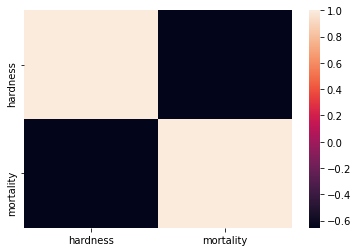

In [7]:
# тепловая карта
sns.heatmap(water[['hardness', 'mortality']].corr())

In [10]:
# построим модель линейной регрессии (регрессивный анализ)
# форма зависимости - простая, линейная

x = water[['hardness']]   # на основе чего
y = water[['mortality']]    # что прогнозируем

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [13]:
x_train.shape

(42, 1)

In [14]:
y_train.shape

(42, 1)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [16]:
#  изучаем коэффициент k,    y=kx+b
model.coef_

array([[-3.13167087]])

In [17]:
# изучаем независимый член b,   y=kx+b
model.intercept_

array([1668.97229773])

In [18]:
# делаем прогнозирование на тестовых данных (проверка)
y_pred = model.predict(x_test)
y_pred

array([[1340.14685615],
       [1637.65558901],
       [1625.12890552],
       [1531.17877935],
       [1424.7019697 ],
       [1606.33888028],
       [1252.46007173],
       [1434.09698232],
       [1603.20720941],
       [1650.18227249],
       [1484.20371627],
       [1415.30695708],
       [1546.83713371],
       [1625.12890552],
       [1446.62366581],
       [1546.83713371],
       [1637.65558901],
       [1621.99723465],
       [1352.67353964]])

In [21]:
# проверяем правильность прогнозирования, 0 <= R2 <= 1 
# чем ближе значение |R2| к 1, тем лучше регрессия "объясняет" зависимость данных
# метод возвращает значение коэффициента детерминации R2
model.score(x_test, y_test)

0.5046490611017092

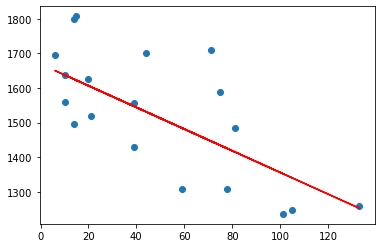

In [22]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [24]:
# посмотрим альтернативным методом на остатки

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [32]:
x_const = sm.add_constant(x_train) # техническая особенность библиотек, надо руками добавить константу

In [33]:
x_const.shape

(42, 2)

In [34]:
x[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [35]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        17:23:35   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [36]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


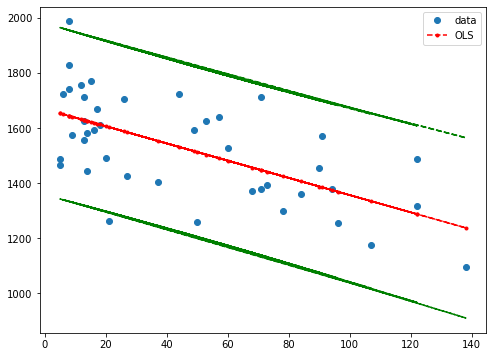

In [37]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

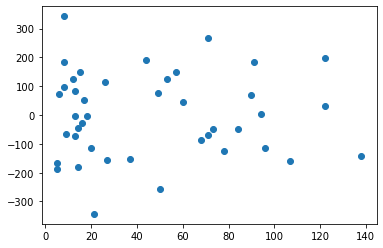

In [38]:
# посмотрим на остатки
plt.scatter(x_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

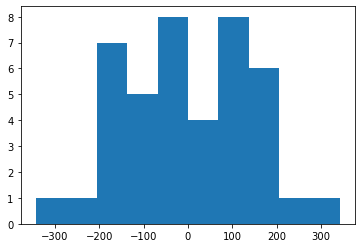

In [39]:
plt.hist(results.resid)

# Анализ остатков (отклонения прогнозируемых величин от фактических) говорит о правильно подобранной модели
так как: 
* остатки хаотичны, 
* нет систематизации, резких выбросов, 
* в чередовании знаков нет закономерностей.

# Проверим аналогичную зависимость для северных и южных городов по отдельности

In [43]:
# Проверим ту же взаимосвязь для южных городов
south = water.loc[water.location == 'South', :]
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


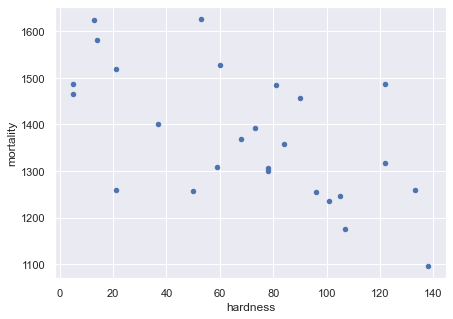

In [82]:
# построим точечный график (визуализацию) для изучения взаимосвязи смертности от жесткости воды в южных городах
south.plot(kind='scatter', x='hardness', y='mortality')

In [86]:
# визуализация показывает нам отсутствие взаимосвязи двух величин

In [116]:
# если нет линейной зависимости, не считаем коэффициент корреляции Пирсона
#south[['hardness', 'mortality']].corr()

In [117]:
# если нет линейной зависимости, не считаем коэффициент корреляции Спирмена
#south[['hardness', 'mortality']].corr(method='spearman')

In [118]:
# если нет линейной зависимости, не строим модель линейной регрессии (регрессивный анализ)
# если попробовать выстроить, получим отрицательный R2, остатки будут иметь выбросы и не хаотичное нормальное распределение
# возможная причина - данные для этой группы городов носят не непрерывный характер

In [146]:
# Несколько лучше ситуация (есть очень слабая связь данных) для северных городов
# анализ остатков также говорит о неверной модели для анализа (сравнимой с прогнозом среднего)
# остатки расположены не хаотично, имеют не нормальное распределение

In [119]:
# Проверим ту же взаимосвязь для северных городов
north = water.loc[water.location == 'North', :]
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


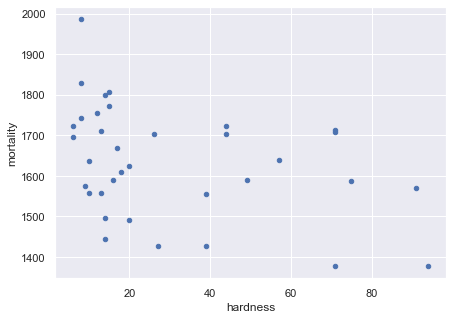

In [120]:
# построим точечный график (визуализацию) для изучения взаимосвязи смертности от жесткости воды в северных городах
north.plot(kind='scatter', x='hardness', y='mortality')

In [148]:
# визуализация показывает нам возможнуюочень слабую отрицательную взаимосвязь двух величин
# взаимосвязь трудно описать линейным характером, в большей степени не нормальное распределение, наблюдаются значительные выбросы
# попробуем рассчитать ккоэффициент корреляции Пирсона (Спирмана, Кенделла)

In [121]:
# считаем коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [122]:
# считаем коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


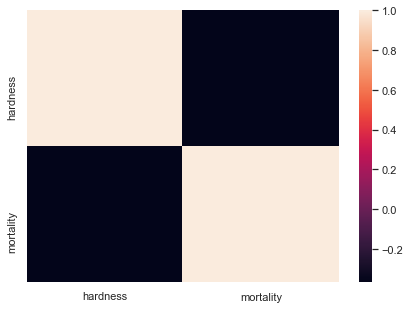

In [123]:
# тепловая карта
sns.heatmap(north[['hardness', 'mortality']].corr())

In [124]:
# построим модель линейной регрессии (регрессивный анализ)
# допустим, форма зависимости - простая, линейная

x = north[['hardness']]   # на основе чего
y = north[['mortality']]    # что прогнозируем

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [126]:
x_train.shape

(24, 1)

In [127]:
y_train.shape

(24, 1)

In [128]:
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [129]:
#  изучаем коэффициент k,    y=kx+b
model.coef_

array([[-1.97686226]])

In [132]:
# изучаем независимый член b,   y=kx+b
model.intercept_

array([1688.15022903])

In [133]:
# делаем прогнозирование на тестовых данных (проверка)
y_pred = model.predict(x_test)
y_pred

array([[1672.33533095],
       [1670.35846869],
       [1660.47415739],
       [1676.28905547],
       [1656.52043287],
       [1547.79300857],
       [1601.16828959],
       [1672.33533095],
       [1611.05260089],
       [1658.49729513],
       [1611.05260089]])

In [134]:
# проверяем правильность прогнозирования, 0 <= R2 <= 1 
# чем ближе значение |R2| к 1, тем лучше регрессия "объясняет" зависимость данных
# метод возвращает значение коэффициента детерминации R2
model.score(x_test, y_test)

0.018885304285745863

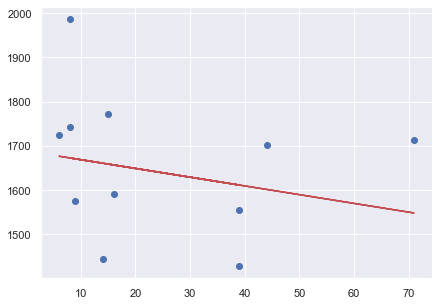

In [135]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [136]:
# посмотрим альтернативным методом на остатки

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [138]:
x_const = sm.add_constant(x_train) # техническая особенность библиотек, надо руками добавить константу

In [139]:
x_const.shape

(24, 2)

In [140]:
x[:5]

,hardness
1,17
3,14
4,18
5,10
6,15


In [141]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Wed, 23 Dec 2020   Prob (F-statistic):             0.0316
Time:                        18:44:29   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [142]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033503


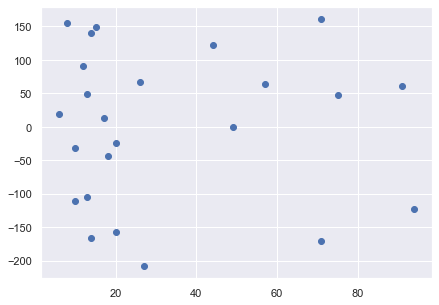

In [144]:
# посмотрим на остатки
plt.scatter(x_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <a list of 10 Patch objects>)

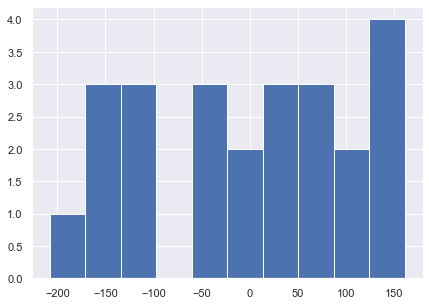

In [145]:
plt.hist(results.resid)